In [109]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_summary import DataFrameSummary
import matplotlib.pyplot as plt # plot
plt.rcParams['figure.figsize'] = [16, 10]

import datetime as dt #

import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split

## EDA

In [11]:
np.random.seed(1987)
N = 100000 # number of sample rows in plots
t0 = dt.datetime.now()
train = pd.read_csv('./input/nyc-taxi-trip-duration/train.csv')
test = pd.read_csv('./input/nyc-taxi-trip-duration/test.csv')
sample_submission = pd.read_csv('./input/nyc-taxi-trip-duration/sample_submission.csv')

In [19]:
print('We have {} training rows and {} test rows.'.format(train.shape[0], test.shape[0]))
print('We have {} training columns and {} test columns.'.format(train.shape[1], test.shape[1]))
train.head(2)

We have 1458644 training rows and 625134 test rows.
We have 11 training columns and 9 test columns.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [20]:
test.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N


In [43]:
train_summary = DataFrameSummary(train)
test_summary = DataFrameSummary(test)

In [44]:
display(train_summary.summary())
display(test_summary.summary())

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,NaN,1.45864e+06,NaN,NaN,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,NaN,1.45864e+06
mean,NaN,1.53495,NaN,NaN,1.66453,-73.9735,40.7509,-73.9734,40.7518,NaN,959.492
std,NaN,0.498777,NaN,NaN,1.31424,0.0709019,0.0328812,0.0706433,0.0358906,NaN,5237.43
min,NaN,1,NaN,NaN,0,-121.933,34.3597,-121.933,32.1811,NaN,1
25%,NaN,1,NaN,NaN,1,-73.9919,40.7373,-73.9913,40.7359,NaN,397
50%,NaN,2,NaN,NaN,1,-73.9817,40.7541,-73.9798,40.7545,NaN,662
75%,NaN,2,NaN,NaN,2,-73.9673,40.7684,-73.963,40.7698,NaN,1075
max,NaN,2,NaN,NaN,9,-61.3355,51.8811,-61.3355,43.921,NaN,3.52628e+06
counts,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644
uniques,1458644,2,1380222,1380377,10,23047,45245,33821,62519,2,7417


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
count,NaN,625134,NaN,625134,625134,625134,625134,625134,NaN
mean,NaN,1.53488,NaN,1.66177,-73.9736,40.7509,-73.9735,40.7518,NaN
std,NaN,0.498782,NaN,1.31129,0.073389,0.0298478,0.0725649,0.0358239,NaN
min,NaN,1,NaN,0,-121.933,37.3896,-121.933,36.6013,NaN
25%,NaN,1,NaN,1,-73.9919,40.7374,-73.9913,40.736,NaN
50%,NaN,2,NaN,1,-73.9817,40.7541,-73.9798,40.7545,NaN
75%,NaN,2,NaN,2,-73.9674,40.7684,-73.963,40.7699,NaN
max,NaN,2,NaN,9,-69.2489,42.8149,-67.4968,48.8576,NaN
counts,625134,625134,625134,625134,625134,625134,625134,625134,625134
uniques,625134,2,610581,8,18926,38408,26476,51439,2


In [42]:
print('Id is unique.') if train.id.nunique() == train.shape[0] else print('oops')
print('Train and test sets are distinct.') if len(np.intersect1d(train.id.values, test.id.values))== 0 else print('oops')
print('We do not need to worry about missing values.') if train.count().min() == train.shape[0] and test.count().min() == test.shape[0] else print('oops')
print('The store_and_fwd_flag is boolean') if train_summary.summary().store_and_fwd_flag.types == 'bool' else print('oops')

Id is unique.
Train and test sets are distinct.
We do not need to worry about missing values.
The store_and_fwd_flag is boolean


In [48]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train.loc[:, 'pickup_date'] = train.pickup_datetime.dt.date

test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
test.loc[:, 'pickup_date'] = test.pickup_datetime.dt.date

train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)


train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')
test['store_and_fwd_flag'] = 1 * (test.store_and_fwd_flag.values == 'Y')

In [50]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26


In [54]:
train['check_trip_duration'] = (train['dropoff_datetime'] - train['pickup_datetime']).map(lambda x: x.total_seconds())

In [55]:
duration_difference = train[np.abs(train['check_trip_duration'].values - train['trip_duration'].values) > 1]

In [56]:
duration_difference

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration


In [57]:
print('Trip_duration and datetimes are ok.') if len(duration_difference) == 0 else print('oops')

Trip_duration and datetimes are ok.


In [90]:
print("Max trip duration is {:.1f} hours in train dataset.".format(train.trip_duration.max() / 3600))

Max trip duration is 979.5 hours in train dataset.


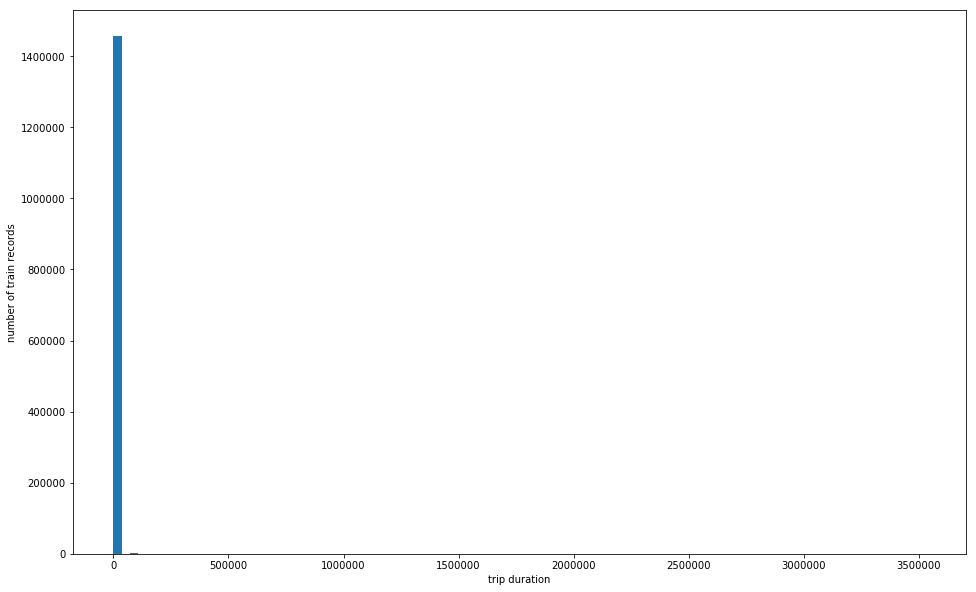

In [112]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel("trip duration")
plt.ylabel("number of train records")
plt.show()

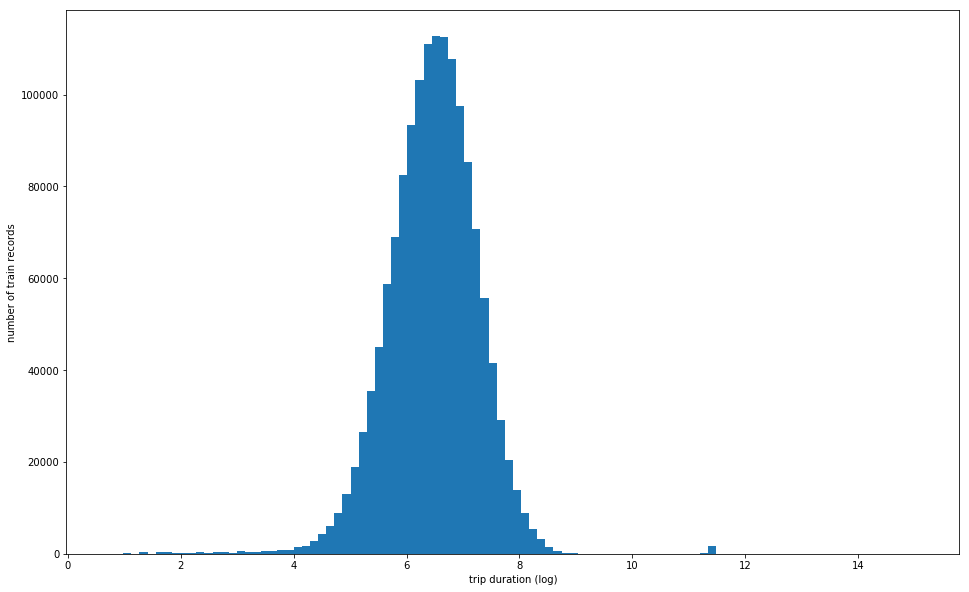

In [111]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel("trip duration (log)")
plt.ylabel("number of train records")
plt.show()

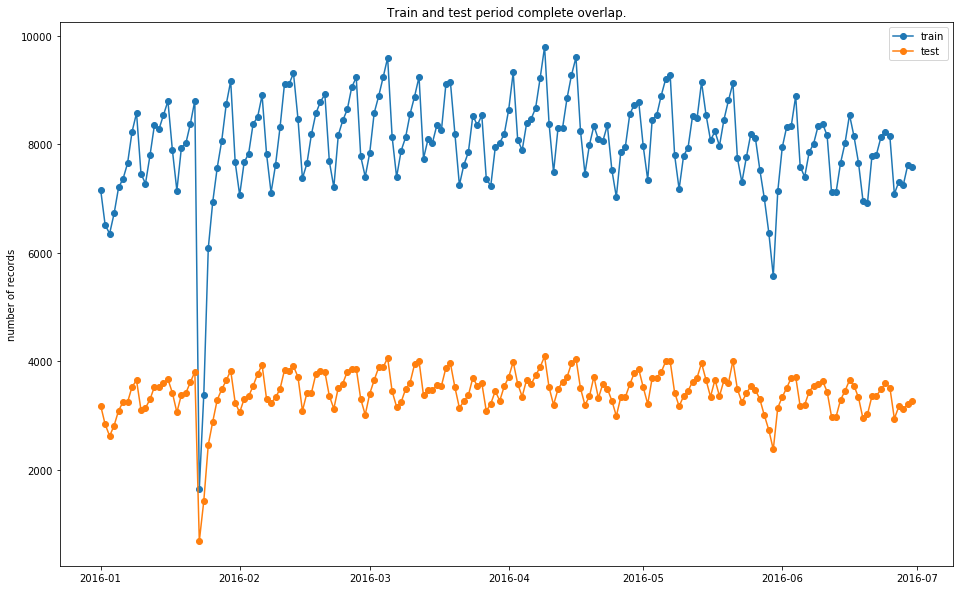

In [116]:
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Train and test period complete overlap.')
plt.legend()
plt.ylabel('number of records')
plt.show()

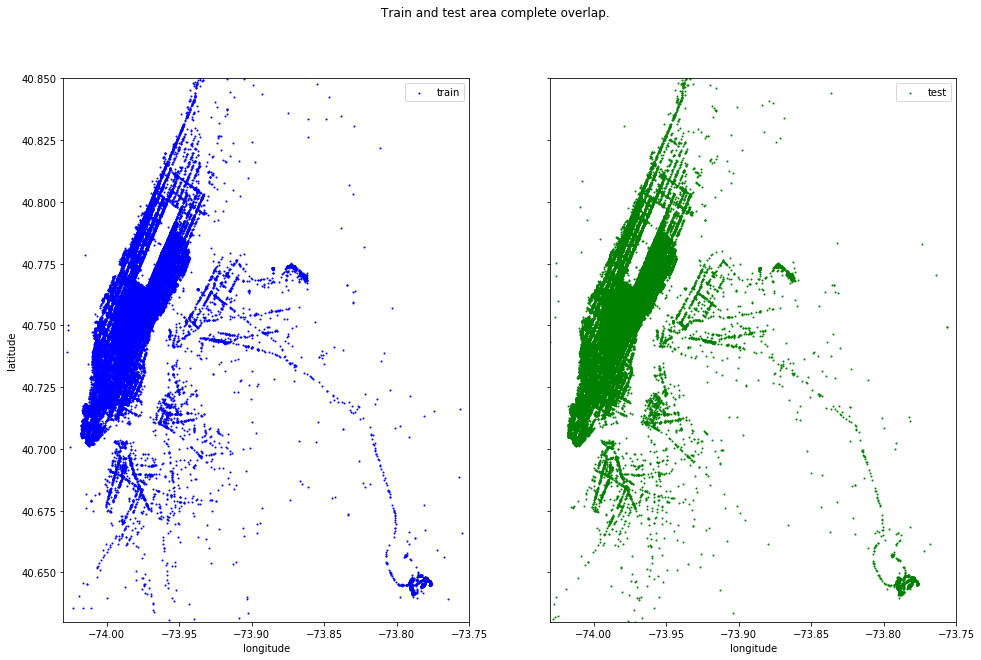

In [131]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

ax[0].scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N], color="blue", s=1, label="train")#, alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values[:N], test['pickup_latitude'].values[:N], color="green", s=1, label="test")#, alpha=0.1)

fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [132]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,455.0,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,663.0,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,2124.0,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,429.0,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,435.0,6.077642


## TODO Feature Extraction

### PCA

### Distance

### Datetime features

### Speed

### Clustering

### Temporal and geospatial aggregation

### OSRM Features

## TODO Feature check before modeling

## Used Features

In [145]:
%%time
feature_names = list(train.columns)
# print(np.setdiff1d(train.columns, test.columns))
do_not_use_for_training = ['id', 'log_trip_duration', 'pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration',
                           'pickup_date', 'avg_speed_h', 'avg_speed_m', 'pickup_lat_bin', 'pickup_long_bin',
                           'center_lat_bin', 'center_long_bin', 'pickup_dt_bin', 'pickup_datetime_group']
feature_names = [f for f in train.columns if f not in do_not_use_for_training]
display(feature_names)
print('We have %i features.' % len(feature_names))
train[feature_names].count()
y = np.log(train['trip_duration'].values + 1)

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag']

We have 7 features.
CPU times: user 199 ms, sys: 36.3 ms, total: 235 ms
Wall time: 236 ms


## Modeling

In [159]:
train_x, valid_x, train_y, valid_y = train_test_split(train[feature_names].values, y, test_size=0.2, random_state=1987)

dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)
dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Try different parameters! My favorite is random search :)
xgb_pars = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10, 'subsample': 0.8,
            'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [186]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 'max_depth': 6, 'subsample': 0.9,
            'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [187]:
model = xgb.train(xgb_pars, dtrain, 500, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:3.06493	valid-rmse:3.0663
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.532257	valid-rmse:0.537314
[20]	train-rmse:0.511177	valid-rmse:0.517522
[30]	train-rmse:0.497627	valid-rmse:0.504857
[40]	train-rmse:0.489937	valid-rmse:0.498003
[50]	train-rmse:0.48511	valid-rmse:0.493936
[60]	train-rmse:0.481015	valid-rmse:0.490699
[70]	train-rmse:0.477331	valid-rmse:0.487879
[80]	train-rmse:0.475426	valid-rmse:0.486803
[90]	train-rmse:0.473975	valid-rmse:0.485911
[100]	train-rmse:0.472177	valid-rmse:0.484816
[110]	train-rmse:0.470669	valid-rmse:0.483882
[120]	train-rmse:0.468685	valid-rmse:0.482552
[130]	train-rmse:0.467327	valid-rmse:0.481907
[140]	train-rmse:0.466166	valid-rmse:0.481218
[150]	train-rmse:0.46491	valid-rmse:0.480626
[160]	train-rmse:0.463757	valid-rmse:0.480078
[170]	train-rmse:0.462867	valid-rmse:0.479755
[180]	train-rmse:0.462293	valid-rmse:0.4796

In [188]:
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.47578


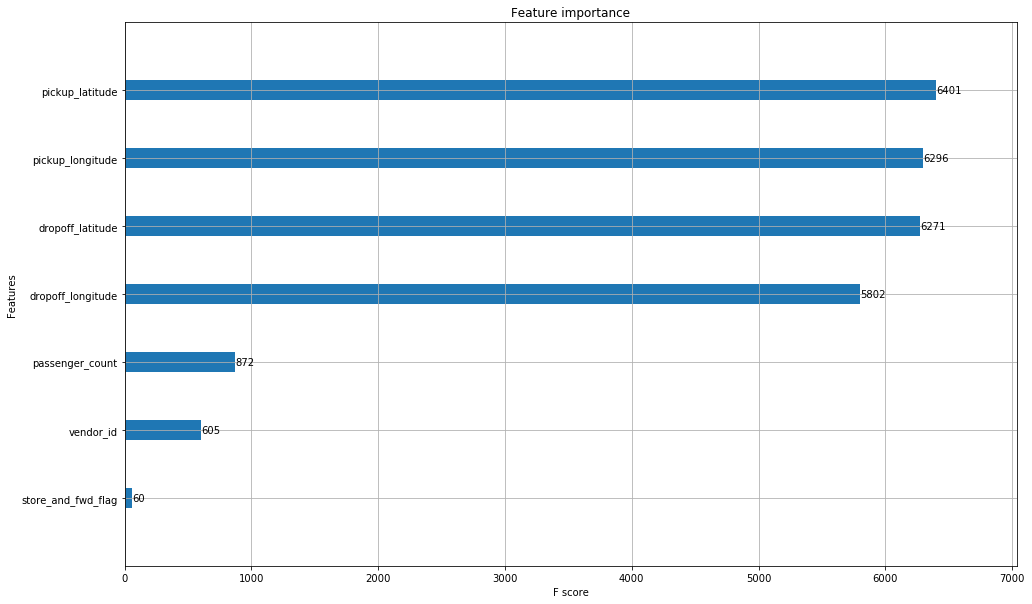

In [190]:
model.feature_names = feature_names
xgb.plot_importance(model, height=0.3)
plt.show()

In [185]:
model = xgb.train(xgb_pars, dtrain, 500, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:4.24293	valid-rmse:4.24413
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.656074	valid-rmse:0.662023
[20]	train-rmse:0.614397	valid-rmse:0.622513
[30]	train-rmse:0.589528	valid-rmse:0.599067
[40]	train-rmse:0.566095	valid-rmse:0.576791
[50]	train-rmse:0.540244	valid-rmse:0.553141
[60]	train-rmse:0.529457	valid-rmse:0.543175
[70]	train-rmse:0.527252	valid-rmse:0.5419
[80]	train-rmse:0.522686	valid-rmse:0.537826
[90]	train-rmse:0.521885	valid-rmse:0.537262
[100]	train-rmse:0.520761	valid-rmse:0.536416
[110]	train-rmse:0.515875	valid-rmse:0.532265
[120]	train-rmse:0.512453	valid-rmse:0.529262
[130]	train-rmse:0.511278	valid-rmse:0.528342
[140]	train-rmse:0.507965	valid-rmse:0.525706
[150]	train-rmse:0.507833	valid-rmse:0.525703
[160]	train-rmse:0.50773	valid-rmse:0.52572
[170]	train-rmse:0.504193	valid-rmse:0.522994
[180]	train-rmse:0.504108	valid-rmse:0.52298

In [184]:
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.51667


In [175]:
# feature_names
model.feature_names = feature_names

## Feature Importance

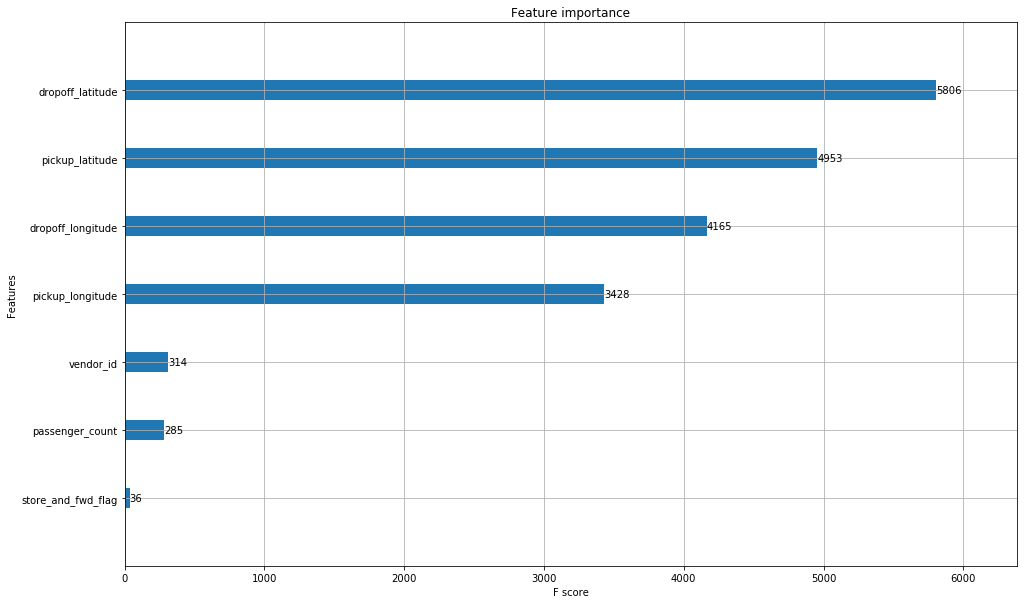

In [178]:
xgb.plot_importance(model, height=0.3)
plt.show()